In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import arch
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [3]:
tickers = ['^N225']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * data.Close.ffill().pct_change().dropna()

Text(0.5, 1.0, '^N225 Returns')

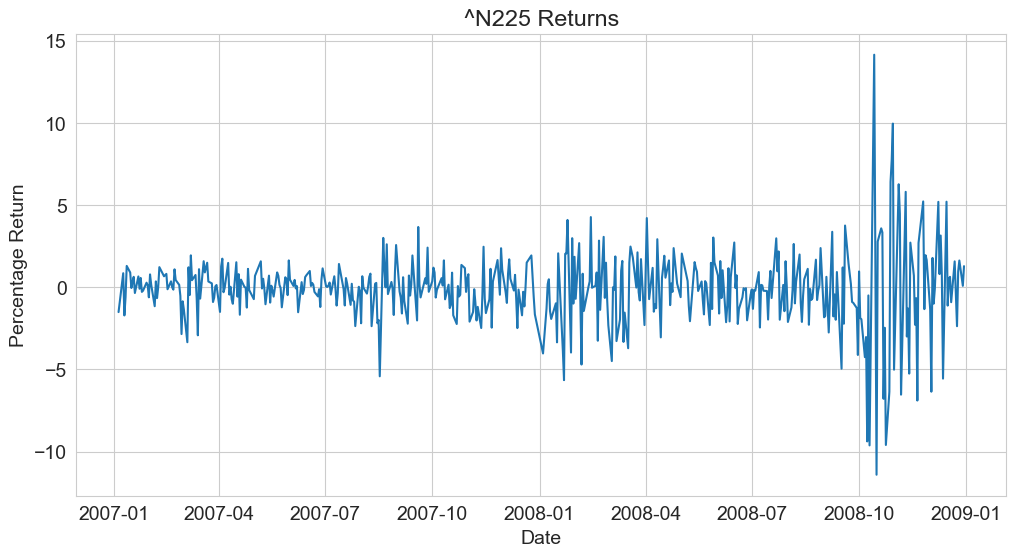

In [5]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.xlabel('Date')
plt.title('^N225 Returns')

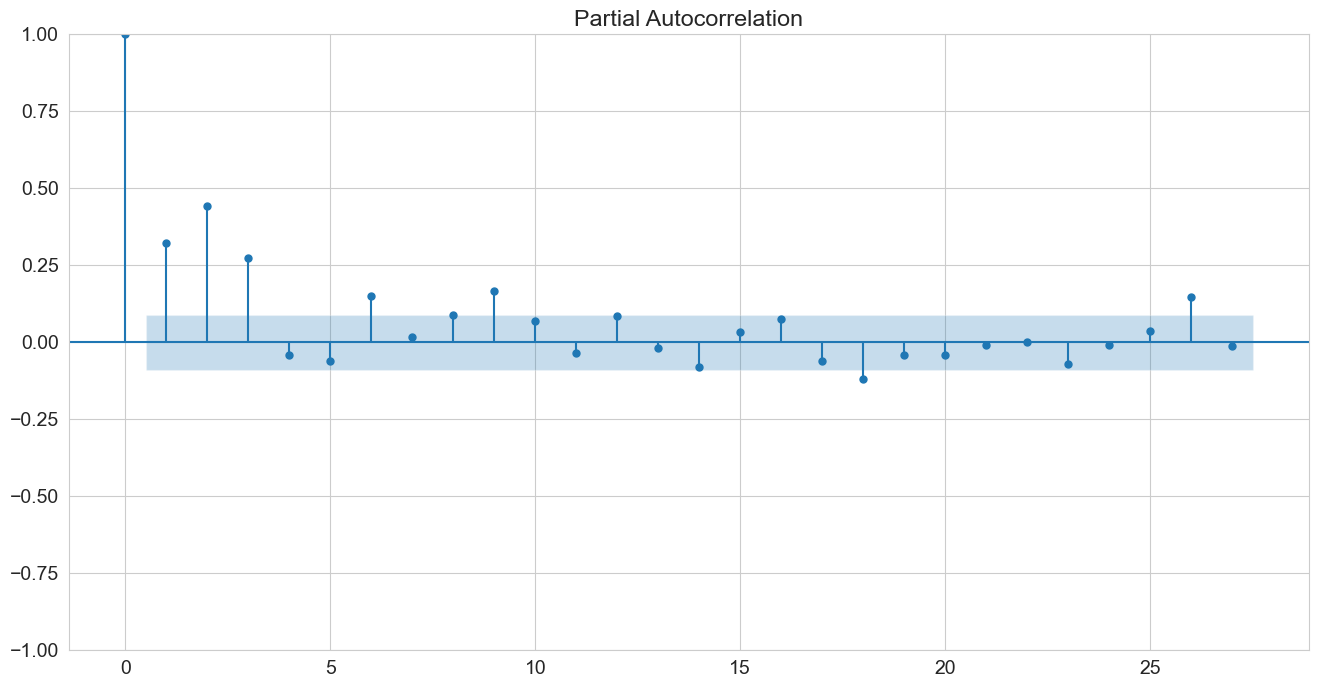

In [6]:
# squares each value in the returns variable
plot_pacf(returns**2)
plt.show()

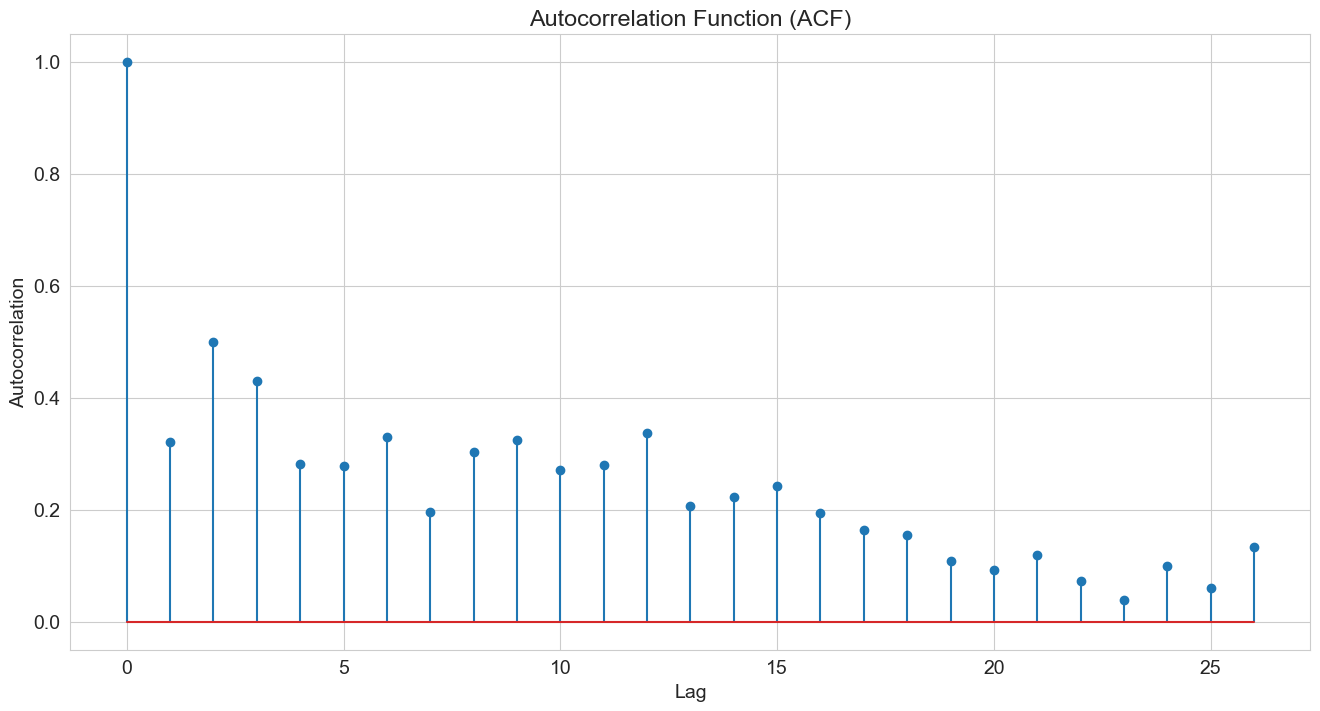

In [7]:
acf_result = sm.tsa.acf(returns**2)

#Plot ACF
plt.stem(acf_result)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [8]:
# Create GARCH-t model
model = arch_model(returns, p=2, q=0, vol='Garch', dist='t')

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2015.4523087740517
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1586.9934363151542
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1421.2848968061003
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1526.470825410537
Iteration:      5,   Func. Count:     36,   Neg. LLF: 968.1119357261682
Iteration:      6,   Func. Count:     43,   Neg. LLF: 958.2276232802826
Iteration:      7,   Func. Count:     49,   Neg. LLF: 958.046161451526
Iteration:      8,   Func. Count:     55,   Neg. LLF: 957.9779331734903
Iteration:      9,   Func. Count:     61,   Neg. LLF: 957.9235225069322
Iteration:     10,   Func. Count:     67,   Neg. LLF: 957.9108490297962
Iteration:     11,   Func. Count:     73,   Neg. LLF: 957.9061774466079
Iteration:     12,   Func. Count:     79,   Neg. LLF: 957.9057119199919
Iteration:     13,   Func. Count:     85,   Neg. LLF: 957.9056595216836
Iteration:     14,   Func. Count:     91,   Neg. LLF: 957.9056

In [10]:
print(model_fit.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -957.906
Distribution:      Standardized Student's t   AIC:                           1925.81
Method:                  Maximum Likelihood   BIC:                           1946.77
                                              No. Observations:                  489
Date:                      Sat, Jan 27 2024   Df Residuals:                      488
Time:                              15:21:37   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [11]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [12]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

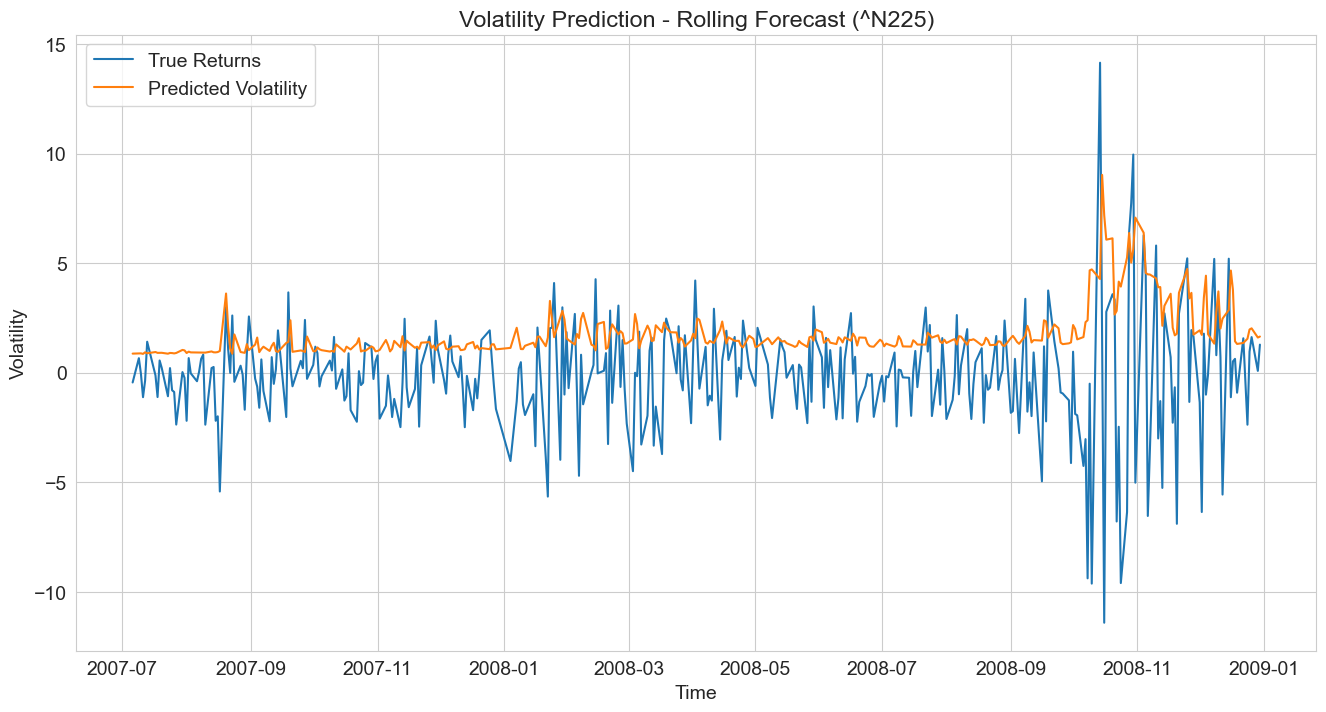

In [14]:
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast (^N225)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility'])
plt.savefig('Volatility_Comparison_N225.png')